In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

/u/home/hliastro/yt-x86_64/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## remove lines from failed global timesteps

In [2]:
import subprocess
output = subprocess.check_output(["grep -nr 'done with \| restart' std.10SFE.new"], shell=True)

In [3]:
temp = output.split('\n')
start = 0
end = 0
line_range = []
for i in temp:
    if 'done with' in i:
        end = int(i.split(':')[0])
        line_range.append([start, end])
        start = int(i.split(':')[0])
    elif 'restart' in i:
        start = int(i.split(':')[0])

In [4]:
def select_lines(data, ranges):
    d = []
    for r in ranges:
        d.extend( data[r[0]:r[1]] )
    return d

In [6]:
inp = open('std.10SFE.new').readlines()

In [7]:
inp = select_lines(inp, line_range)

## get data from lines with 'Hui'

In [24]:
data = np.zeros([len(inp), 8])
for i in range(len(inp)):
    l = inp[i]
    if 'Hui' in l:
        if 'id' in l:
            t = l.split('=')
            data[i,0] = float(t[1].split(',')[0])
            data[i,1] = float(t[2].split(',')[0])
            data[i,2] = float(t[3].split(',')[0])
            data[i,3] = float(t[4].split(',')[0])
            data[i,4] = float(t[5].split(',')[0])
            data[i,5] = float(t[6].split(',')[0])
            data[i,6] = float(t[7].split(',')[0])
            data[i,7] = float(t[8].split(',')[0])
#             d1 = int(t[1].split(',')[0])
#             d2 = float(t[2].split(',')[0])
#             d3 = float(t[3].split(',')[0])
#             d4 = float(t[4].split(',')[0])
#             data.append([d1,d2,d3,d4])

## get cluster particle list

In [25]:
data = data[data[:,0]!=0]
id_list = np.unique(data[:,0])

In [34]:
data_sorted = []
for id in id_list:
    data_sorted.append(data[data[:,0]==id])

## select those whose mass and age are in reasonable range

In [35]:
plt.style.use('niceplot')

In [78]:
mass_temp = []
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    mass_temp.append(d[:,3][-1])

In [81]:
np.max(mass_temp)

17031.160209000001

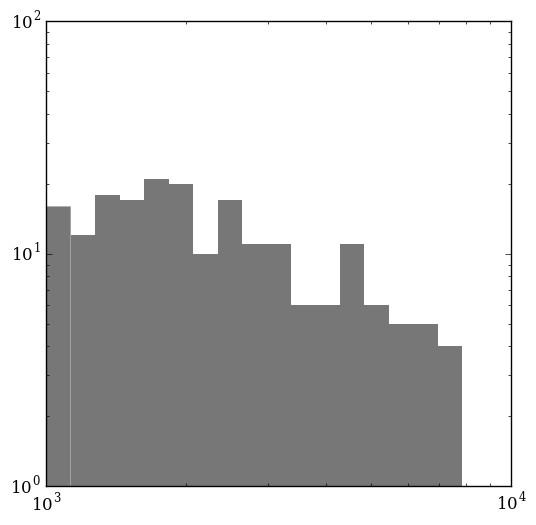

In [84]:
plt.hist(mass_temp, bins=np.logspace(3,4,20))
plt.xscale('log')
plt.yscale('log')

In [143]:
import scipy.special as sp

0.138761727528
0.275032140025
0.311402544143
0.199071595463
0.482786423791
0.147923909403


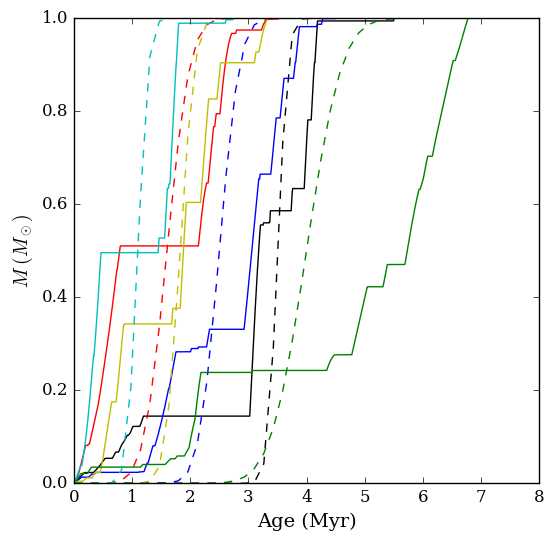

In [178]:
color = ['k', 'b', 'r', 'y', 'g', 'c']
t0_6 = [3.50533409481, 2.5, 1.6, 1.8261520102, 4, 1.1]
sigma = []
i = 0
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    if d[:,3][-1]<7e3:
        continue
    
    age = d[:,5]
    mass = d[:,3]
    density = d[:,6]
    fH2 = d[:,7]
    plt.plot(age/1e6, mass/mass[-1], c=color[i])
    
    sigma.append(tau_postpro(age, mass)[1]/2./np.sqrt(np.pi))
    print tau_postpro(age, mass)[1]/2./np.sqrt(np.pi)
    
    t0 = t0_6[i]
    s2 = 2**0.5*sigma[i]
    m_cum = (sp.erf(t0/s2)+sp.erf((age_plot-t0)/s2))/(sp.erf(t0/s2)+sp.erf((tmax-t0)/s2))
    plt.plot(age_plot, m_cum, ls='--', c=color[i])
    
    i=i+1

    
# overplot fitted Gaussian function
tmax= 15
age_plot = np.linspace(0,8)
# for i in range(len(sigma)):
#     t0 = t0_6[i]/1e6
#     s2 = 2**0.5*sigma[i]
#     m_cum = (sp.erf(t0/s2)+sp.erf((age_plot-t0)/s2))/(sp.erf(t0/s2)+sp.erf((tmax-t0)/s2))
#     plt.plot(age_plot, m_cum, ls='--')
    
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(0,8)
plt.ylim(0,1)
plt.xlabel('Age (Myr)')
plt.ylabel(r'$M\;(M_\odot)$')
plt.savefig('mass_cum_history.png')

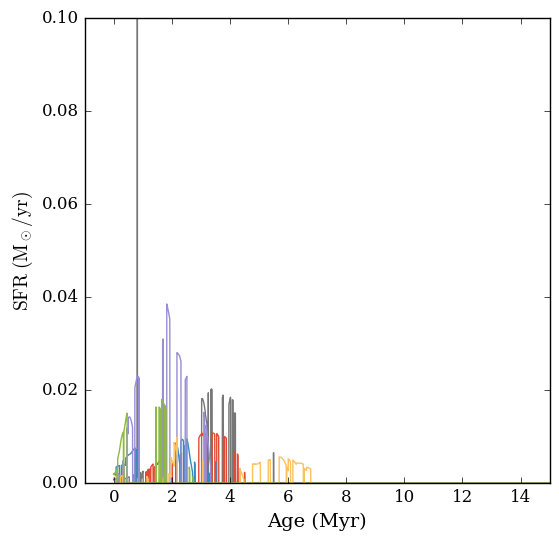

In [182]:
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    if d[:,3][-1]<7e3:
        continue
    age = d[:,5]
    mass = d[:,3]
    SFR = (mass[1:]-mass[:-1])/(age[1:]-age[:-1])
    #plt.plot((age[1:]+age[:-1])/2., mass[1:]-mass[:-1], label='SFR')
    plt.plot((age[1:]+age[:-1])/2./1e6, SFR, label='SFR')
    
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(-1,15)
plt.ylim(0,0.1)
#plt.legend(loc='lower right')
plt.xlabel('Age (Myr)')
plt.ylabel(r'$\rm SFR \; (M_\odot/yr)$')

3.50533409481
3.63868474293
2.51126775758
1.8261520102
0.559696666795
0.929208542753


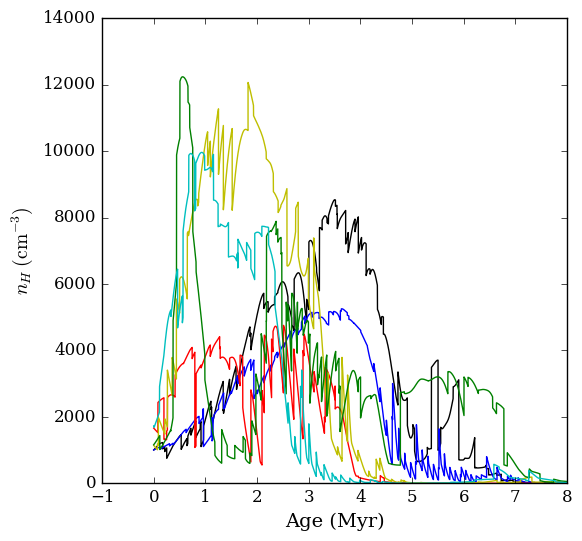

In [161]:
i=0
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    if d[:,3][-1]<7e3:
        continue
    age = d[:,5]
    mass = d[:,3]
    density = d[:,6]
    fH2 = d[:,7]
    print age[np.argmax(density)]/1e6
    #plt.plot((age[1:]+age[:-1])/2., mass[1:]-mass[:-1])
    plt.plot(age/1e6, density, c=color[i])
    #plt.plot(age, fH2)
    i=i+1
    
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(-1,8)
#plt.ylim(-0.1,1.1)
plt.legend()
plt.xlabel('Age (Myr)')
plt.ylabel(r'$n_H\;(\rm cm^{-3})$')

In [183]:
def tau_postpro(t, mass):
    dm = mass[1:]-mass[:-1]
    t_mid = (t[1:]+t[:-1])/2.
    dt = t[1:]-t[:-1]
    #dt = 1630.
    if np.sum(dm)==0:
        return np.nan, np.nan
    tau_ave = np.sum(dm*t_mid)/np.sum(dm)/1e6
    tau_spread = mass[-1]*mass[-1]/np.sum(dm*dm/dt)/1e6
    return tau_ave, tau_spread#/1.772

In [91]:
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    if d[:,3][-1]<7e3:
        continue
    age = d[:,5]
    mass = d[:,3]
    density = d[:,6]
    fH2 = d[:,7]
    print tau_postpro(age, mass)

(3.1599275220976506, 0.49189751663182774)
(2.7496801845042387, 0.97496355142062752)
(1.4499745928131318, 1.1038932770949945)
(1.7071883821349689, 0.70569043196769443)
(4.830850109089412, 1.7114333120268279)
(1.0048012613544803, 0.52437660572589595)


In [94]:
sim_data = np.loadtxt('cluster_data.txt')

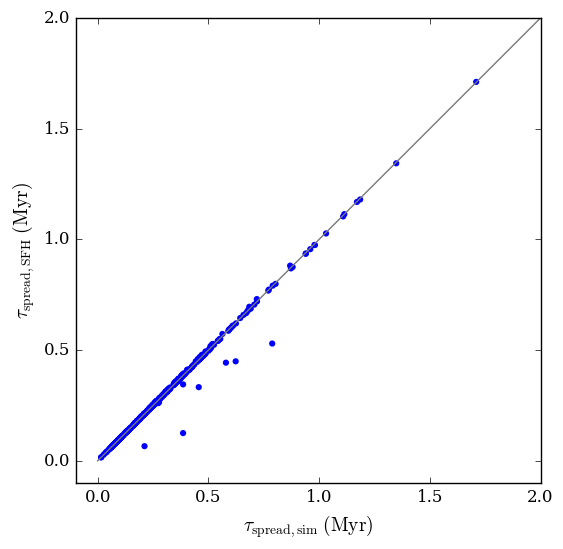

In [122]:
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    id = d[0,0]
    index = sim_data[:,0]==id
    if (np.sum(index)!=1):
        continue
    tau_spread_sim = sim_data[index,2]
    tau_spread_sfh = tau_postpro(d[:,5],d[:,3])[1]
    plt.scatter(tau_spread_sim/1.62, tau_spread_sfh)

plt.plot([0,2],[0,2])
plt.xlim(-0.1,2.0)
plt.ylim(-0.1,2.0)
plt.xlabel(r'$\tau_{\rm spread, sim} \; (\rm Myr)$')
plt.ylabel(r'$\tau_{\rm spread, SFH} \; (\rm Myr)$')
plt.savefig('comparison.png')
plt.show()

In [196]:
def tau_spread_gap(t, mass):
    left = t[0]
    temp = 0
    for i in range(len(t)-1):
        right = t[i+1]
        dt = right-left
        dm = mass[i+1]-mass[i]
        temp += dm*dm/dt
        if dm!=0:
            left = right
    if temp==0:
        return np.nan
    else:
        return mass[-1]*mass[-1]/temp/1e6

In [191]:
test = data_sorted[1000]

In [193]:
tau_spread_gap(test[:,5], test[:,3])

131990.48345976704

In [197]:
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    if d[:,3][-1]<7e3:
        continue
    age = d[:,5]
    mass = d[:,3]
    density = d[:,6]
    fH2 = d[:,7]
    print tau_postpro(age, mass), tau_spread_gap(age, mass)

(3.1599275220976506, 0.49189751663182774) 0.494601844326
(2.7496801845042387, 0.97496355142062752) 0.97760852705
(1.4499745928131318, 1.1038932770949945) 1.10604976062
(1.7071883821349689, 0.70569043196769443) 0.707586414467
(4.830850109089412, 1.7114333120268279) 1.71328237622
(1.0048012613544803, 0.52437660572589595) 0.526150135919
